# Taller 2

Alejandro Escobar Osorio<br>
C.C 1152462796 <br>

### **Objetivo del Negocio**
Poder establecer un rango salarial acorde a las caracteristicas del perfil laboral de la persona que llega  ocupar un rol dentro de la compañía

### **Objetivo Analítico**
Poder predecir un salario adecuado y competitivo para los diferentes cargos dentro de la compañía teniendo en cuenta las características de los candidatos.

## Carga de datos

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport

In [27]:
data=pd.read_csv('data/ds_salaries.csv')

In [3]:
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


## Análisis Exploratorio de Datos (EDA)

##

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
work_year,3755.0,2022.373635,0.691448,2020.0,2022.0,2022.0,2023.0,2023.0
salary,3755.0,190695.571771,671676.500508,6000.0,100000.0,138000.0,180000.0,30400000.0
salary_in_usd,3755.0,137570.389880,63055.625278,5132.0,95000.0,135000.0,175000.0,450000.0
remote_ratio,3755.0,46.271638,48.589050,0.0,0.0,0.0,100.0,100.0


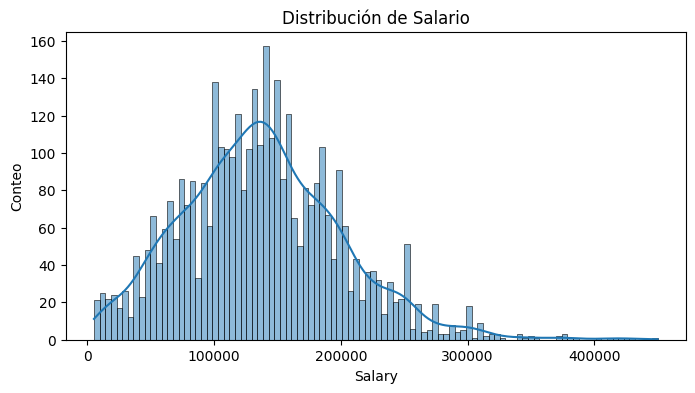

In [6]:
#Distribución de la variable Salario
plt.figure(figsize=(8,4))
sns.histplot(data['salary_in_usd'], bins=100, kde=True)
plt.title('Distribución de Salario')
plt.xlabel('Salary')
plt.ylabel('Conteo')
plt.show()

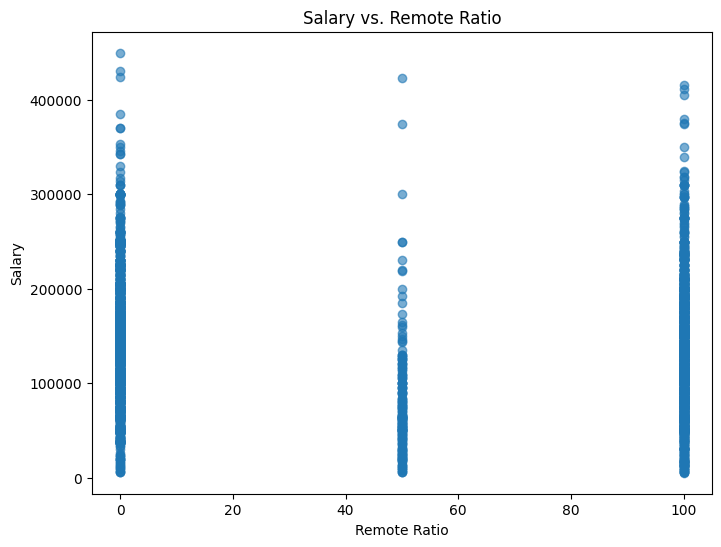

In [7]:
plt.figure(figsize=(8, 6))
plt.scatter(data['remote_ratio'], data['salary_in_usd'], alpha=0.6)
plt.title('Salary vs. Remote Ratio')
plt.xlabel('Remote Ratio')
plt.ylabel('Salary')
plt.show()

In [8]:
#Tipos de categorías
for c in data.select_dtypes(include='object').columns:
    if len(data[c].unique())<30:
        print(f"{c}:{data[c].unique()}")

experience_level:['SE' 'MI' 'EN' 'EX']
employment_type:['FT' 'CT' 'FL' 'PT']
salary_currency:['EUR' 'USD' 'INR' 'HKD' 'CHF' 'GBP' 'AUD' 'SGD' 'CAD' 'ILS' 'BRL' 'THB'
 'PLN' 'HUF' 'CZK' 'DKK' 'JPY' 'MXN' 'TRY' 'CLP']
company_size:['L' 'S' 'M']


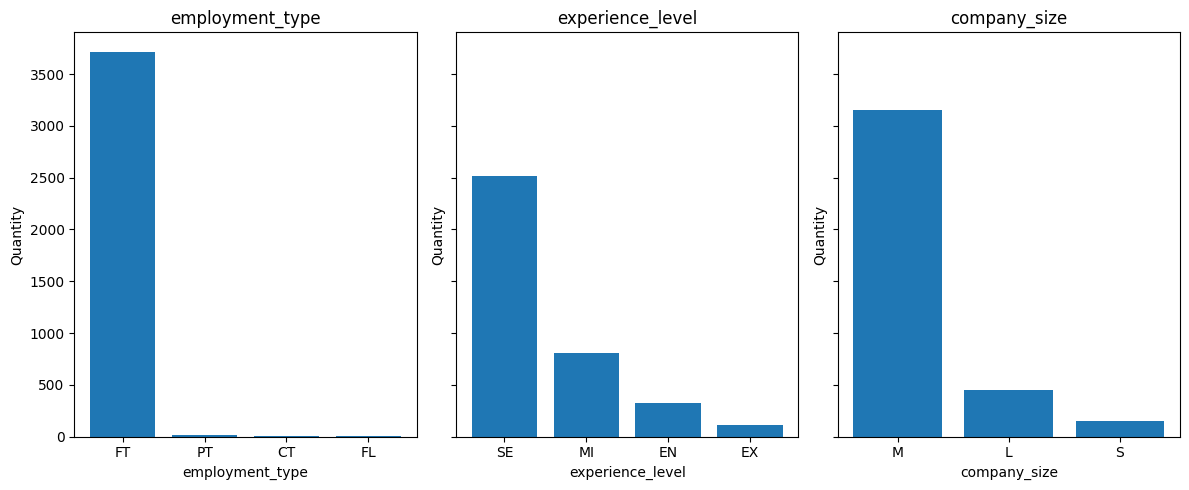

In [9]:
# Distribución de los datos de las variables categoricas
fig, axes = plt.subplots(1, 3, sharey=True, figsize=(12, 5))

columns=['employment_type','experience_level','company_size']

for i,c in enumerate(columns):
    counts = data[c].value_counts()
    axes[i].bar(counts.index, counts.values)
    axes[i].set_title(c)
    axes[i].set_xlabel(c)
    axes[i].set_ylabel('Quantity')

plt.tight_layout()
plt.show()


In [10]:
profile = ProfileReport(data)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Como se puede observar en el análisis exploratori,o no parece que hayan variables que se correlacionen fuertemente con la variable objetivo, a diferencia del salario en dolares y el tipo de moneda. Por lo que, se procederá a tomar todas las variables para el modelado.

## Transformación de Datos

In [28]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler,OrdinalEncoder
from sklearn.model_selection import train_test_split,GridSearchCV


In [46]:
#Transformación datos categoricos
encoder=OneHotEncoder(handle_unknown='ignore', sparse_output=False)

enc=encoder
experience_level_encoded=enc.fit_transform(data[['experience_level']])
df_experience=pd.DataFrame(experience_level_encoded,columns=enc.get_feature_names_out(['experience_level']))

enc=encoder
employment_type_encoded=enc.fit_transform(data[['employment_type']])
df_employment=pd.DataFrame(employment_type_encoded,columns=enc.get_feature_names_out(['employment_type']))

enc=OrdinalEncoder()
job_title_encoded=enc.fit_transform(data[['job_title']])
df_job_title=pd.DataFrame(job_title_encoded,columns=enc.get_feature_names_out(['job_title']))

enc=encoder
salary_currency_encoded=enc.fit_transform(data[['salary_currency']])
df_salary_currency=pd.DataFrame(salary_currency_encoded,columns=enc.get_feature_names_out(['salary_currency']))


enc=encoder
employee_residence_encoded=enc.fit_transform(data[['employee_residence']])
df_employee_residence=pd.DataFrame(employee_residence_encoded,columns=enc.get_feature_names_out(['employee_residence']))

enc=encoder
company_location_encoded=enc.fit_transform(data[['company_location']])
df_company_location=pd.DataFrame(company_location_encoded,columns=enc.get_feature_names_out(['company_location']))

enc=encoder
company_size_encoded=enc.fit_transform(data[['company_size']])
df_company_size=pd.DataFrame(company_size_encoded,columns=enc.get_feature_names_out(['company_size']))

df_cat_encoded=pd.concat([df_experience,df_employment,df_job_title,df_salary_currency,df_employee_residence,df_company_location,df_company_size],axis=1)

In [43]:
#Transformación datos númericos
scaler = MinMaxScaler()
for c in data.select_dtypes('int64'):
    data[c]=scaler.fit_transform(data[[c]])

In [44]:
numeric_features = ['work_year', 'remote_ratio']
target='salary_in_usd'


In [47]:
X = pd.concat([data[numeric_features],df_cat_encoded],axis=1)
y = data[target]

**Transformaciones más usadas**
Las transformaciones más utilizadas en la preparación de datos suelen ser:
* Limpieza/Eliminar filas o columnas vacias
* Imputación númerica utilizando diferentes técnicas como el promedio, la media, o incluso KNN 
* Imputación categorica utilizando la moda o una nueva categoría
* Codificación de variables categóricas Ordinal Encoding, y One Hot Encoding
* Estandarización/Normalización utilizando StandardScaler, MinMaxScaler, MaxAbsScaler
* Extracción de caracteristicas de texto a vector TF-IDF
* En imágenes la normalización de pixeles
* En Audio, o señales la transformacion de laplace, o la transformada de fourier para eliminar frecuencias de ruido
* Reducción de dimensiones (PCA)

## Modelación

In [49]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [34]:
#RandomForest Regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error


model = RandomForestRegressor(random_state=42)
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth':    [10, 20, None],
    'max_features': ['auto', 'sqrt', 0.5],
    'min_samples_leaf': [1, 2, 5]
}

search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=5,
    n_jobs=-1,
    verbose=1
)

search.fit(X_train, y_train)

print("Mejores parámetros:", search.best_params_)
print("Mejor - MSE:", -search.best_score_)

best_rf = search.best_estimator_
y_pred  = best_rf.predict(X_test)
print("Test MSE:", mean_squared_error(y_test, y_pred))
print("Test MAE:", mean_absolute_error(y_test, y_pred))
print("Test R²:", r2_score(y_test, y_pred))

Fitting 5 folds for each of 81 candidates, totalling 405 fits


c:\Users\alejo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
135 fits failed out of a total of 405.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
82 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\alejo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\alejo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\alejo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.

Mejores parámetros: {'max_depth': 10, 'max_features': 0.5, 'min_samples_leaf': 2, 'n_estimators': 300}
Mejor - MSE: 0.011514261472610521
Test MSE: 0.011415423612564623
Test MAE: 0.0810826807901006
Test R²: 0.4277308392830751


In [50]:
#XGBoost
from xgboost import XGBRegressor

xgb = XGBRegressor(
    objective='reg:squarederror',
    use_label_encoder=False,
    eval_metric='rmse',
    seed=42
)

param_grid_xgb = {
    'n_estimators':    [100, 300, 600],
    'max_depth':       [3, 6, 9],
    'learning_rate':   [0.01, 0.1, 0.2],
    'subsample':       [0.6, 0.8, 1.0],
    'colsample_bytree':[0.6, 0.8, 1.0]
}


search_xgb = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid_xgb,
    scoring='neg_mean_squared_error',
    cv=3,
    verbose=1,
    n_jobs=-1
)

search_xgb.fit(X_train, y_train)

print("XGB mejores parametros:", search_xgb.best_params_)
print("XGB - RMSE:", (-search_xgb.best_score_)**0.5)

best_xgb = search_xgb.best_estimator_
preds = best_xgb.predict(X_test)

print("XGB Test RMSE:", mean_squared_error(y_test, preds, squared=False))
print("XGB Test MAE:", mean_absolute_error(y_test, preds))
print("XGB Test R²:", r2_score(y_test, preds))

Fitting 3 folds for each of 243 candidates, totalling 729 fits


c:\Users\alejo\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:04:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGB mejores parametros: {'colsample_bytree': 0.6, 'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 600, 'subsample': 1.0}
XGB - RMSE: 0.10652012595545698
XGB Test RMSE: 0.10652693362133994
XGB Test MAE: 0.08098305821677831
XGB Test R²: 0.43111148981309566


c:\Users\alejo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
#Support Vector Machine
from sklearn.svm import SVR

svr = SVR()

param_grid_svr = {
    'kernel':  ['rbf', 'poly'],
    'C':       [0.1, 1, 10],
    'epsilon': [0.01, 0.1, 1],
    'gamma':   ['scale', 'auto']
}

search_svr = GridSearchCV(
    estimator=svr,
    param_grid=param_grid_svr,
    scoring='neg_mean_squared_error',
    cv=3,
    verbose=1,
    n_jobs=-1
)

search_svr.fit(X_train, y_train)

print("SVR mejores parametros:", search_svr.best_params_)
print("SVR - RMSE:   ", (-search_svr.best_score_)**0.5)

best_svr = search_svr.best_estimator_
preds = best_svr.predict(X_test)

print("SVR Test RMSE:", mean_squared_error(y_test, preds, squared=False))
print("SVR Test MAE:", mean_absolute_error(y_test, preds))
print("SVR Test R²:", r2_score(y_test, preds))


Fitting 3 folds for each of 36 candidates, totalling 108 fits
SVR mejores parametros: {'C': 10, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
SVR - RMSE:    0.11033645531116297
SVR Test RMSE: 0.11012149991128636
SVR Test MAE: 0.0810826807901006
SVR Test R²: 0.39207144021344376


c:\Users\alejo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
#MLP Regressor
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(random_state=42, max_iter=300)

param_grid_mlp = {
    'hidden_layer_sizes': [(50,), (100,), (100,50)],
    'alpha':              [1e-5, 1e-4, 1e-3],
    'learning_rate_init': [1e-4, 1e-3, 1e-2]
}

search_mlp = GridSearchCV(
    estimator=mlp,
    param_grid=param_grid_mlp,
    scoring='neg_mean_squared_error',
    cv=3,
    verbose=1,
    n_jobs=-1
)

search_mlp.fit(X_train, y_train)

print("MLP mejores parametros:", search_mlp.best_params_)
print("MLP - RMSE:", (-search_mlp.best_score_)**0.5)

best_mlp = search_mlp.best_estimator_
preds = best_mlp.predict(X_test)
print("MLP Test RMSE:", mean_squared_error(y_test, preds, squared=False))
print("MLP Test MAE:", mean_absolute_error(y_test, y_pred))
print("MLP Test R²:", r2_score(y_test, preds))


Fitting 3 folds for each of 27 candidates, totalling 81 fits
MLP mejores parametros: {'alpha': 0.001, 'hidden_layer_sizes': (100,), 'learning_rate_init': 0.001}
MLP - RMSE: 0.11359794447177049
MLP Test RMSE: 0.1138408900745158
MLP Test MAE: 0.0810826807901006
MLP Test R²: 0.35031195446309893


c:\Users\alejo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [36]:
#KNN
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()

param_grid_knn = {
    'n_neighbors': [3, 5, 7, 10],
    'weights':     ['uniform', 'distance'],
    'p':           [1, 2]
}

search_knn = GridSearchCV(
    estimator=knn,
    param_grid=param_grid_knn,
    scoring='neg_mean_squared_error',
    cv=3,
    verbose=1,
    n_jobs=-1
)

search_knn.fit(X_train, y_train)

print("KNN mejores parametros:", search_knn.best_params_)
print("KNN - RMSE:", (-search_knn.best_score_)**0.5)

best_knn = search_knn.best_estimator_
preds = best_knn.predict(X_test)
print("KNN Test RMSE:", mean_squared_error(y_test, preds, squared=False))
print("KNN Test MAE:", mean_absolute_error(y_test, preds))
print("KNN Test R²:", r2_score(y_test, preds))


Fitting 3 folds for each of 16 candidates, totalling 48 fits
KNN mejores parametros: {'n_neighbors': 10, 'p': 1, 'weights': 'uniform'}
KNN - RMSE: 0.11495799902078926
KNN Test RMSE: 0.11557574296054907
KNN Test MAE: 0.08814199731437566
KNN Test R²: 0.3303595212872169


c:\Users\alejo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## Evaluación

En este caso específico la métrica de desempeño que más peso tendría sería el Mean Absiolute Error(MAE), debido a que nos indica cual es el error absoluto obtenido por el modelo, es decir, nos indica el valor promedio de dolares en los que el modelo se está desviando en su predicción. A diferencia del RMSE, que su medida nos indica cual es el promedio de los outliers que está prediciendo, y aunque es importante, en este caso preferimos tener en cuenta que el valor que estamos prediciendo no esté muy zafado del valor del mercado, porque los valores outliers son fáciles de identificar en este tipo de contexto.
De acuerdo a lo comentado anteriormente y los resultados obtenidos, el modelo que escogería sería el **Random Forest**, porque aunque presenta una métrica de **MAE** muy parecido al modelo de XGBoost, y su R2 es casi identico, el Random Forest es un poco más simple en su arquitectura, XGBoost que también está compuesto por árboles de decisión, la composición interna hacen que el entrenamiento de este modelo sea más demorado, al igual que la inferencia.

A pesar que el **Random Forest** fue el modelo escogido, para un entorno productivo todavía faltaría afinar el modelo, porque según las métricas de desempeño, el error promedio está alrededor del 10% que en cantidad de salario puede ser muy alto, pero igual podría utilizarse como sugerencia para establecer una base salarial para cargos nuevos.

## Despliegue

In [37]:
#Creación del Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


numeric_features = ['work_year', 'remote_ratio']
onehot_features = [
    'experience_level', 'employment_type',
    'salary_currency', 'employee_residence',
    'company_location', 'company_size'
]
ordinal_features = ['job_title']
target = 'salary_in_usd'


X = data[numeric_features + onehot_features + ordinal_features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

preprocessor = ColumnTransformer(transformers=[
    ('num', MinMaxScaler(), numeric_features),
    ('oh', OneHotEncoder(handle_unknown='ignore', sparse_output=False), onehot_features),
    ('ord', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), ordinal_features)
])

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(max_depth= 10,n_estimators= 300, max_features= 0.5, min_samples_leaf= 2))
])

pipeline.fit(X_train, y_train)



Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['work_year',
                                                   'remote_ratio']),
                                                 ('oh',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['experience_level',
                                                   'employment_type',
                                                   'salary_currency',
                                                   'employee_residence',
                                                   'company_location',
                                                   'company_size']),
                                                 ('ord',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['job_title'])])),
                ('model',
                 RandomForestRegressor(max_depth=10, max_features=0.5,
                                       min_samples_leaf=2, n_estimators=300))])

In [38]:
import joblib
joblib.dump(pipeline, 'pipeline.joblib')


['pipeline.joblib']

## Modelo en EC2

Servidor en EC2 creado

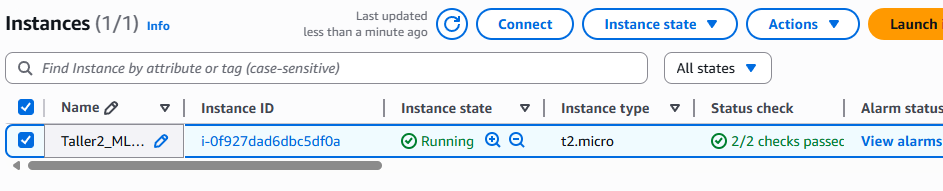

Subiendo el archivo al servicor EC2

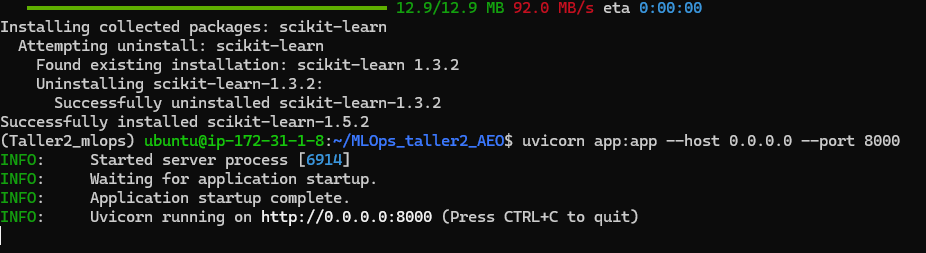

Corriendo con Daemon

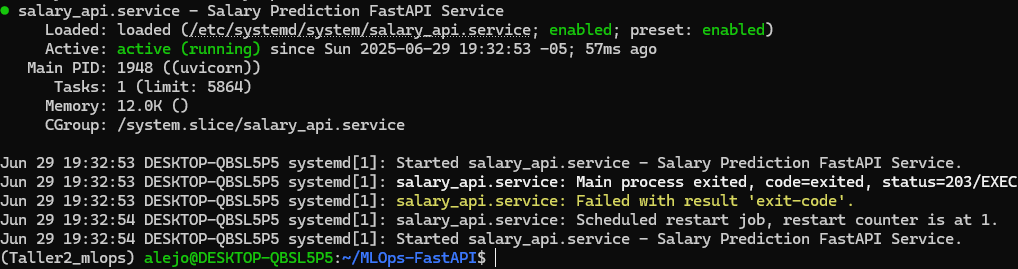